In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

%matplotlib inline
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("Dados 2\spotify.csv")
df.head()

,Date,Shape of You,Despacito,Something Just Like This,HUMBLE.,Unforgettable
0,2017-01-06,12287078,NaN,NaN,NaN,NaN
1,2017-01-07,13190270,NaN,NaN,NaN,NaN
2,2017-01-08,13099919,NaN,NaN,NaN,NaN
3,2017-01-09,14506351,NaN,NaN,NaN,NaN
4,2017-01-10,14275628,NaN,NaN,NaN,NaN


In [4]:
df.drop("Despacito", inplace = True, axis = 1)

In [5]:
df.drop("Something Just Like This", inplace = True, axis = 1)

In [6]:
df.drop("HUMBLE.", inplace = True, axis = 1)

In [7]:
df.drop("Unforgettable", inplace = True, axis = 1)

In [8]:
df.head()

,Date,Shape of You
0,2017-01-06,12287078
1,2017-01-07,13190270
2,2017-01-08,13099919
3,2017-01-09,14506351
4,2017-01-10,14275628


In [9]:
df.isnull()

,Date,Shape of You
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
...,...,...
361,False,False
362,False,False
363,False,False
364,False,False


In [12]:
df.columns = ["Data", "Pessoas"]
df.head()

,Data,Pessoas
0,2017-01-06,12287078
1,2017-01-07,13190270
2,2017-01-08,13099919
3,2017-01-09,14506351
4,2017-01-10,14275628


In [11]:
df.tail()

,Data,Pessoas
361,2018-01-05,4492978
362,2018-01-06,4416476
363,2018-01-07,4009104
364,2018-01-08,4135505
365,2018-01-09,4168506


In [13]:
df.describe()

,Pessoas
count,3.660000e+02
mean,8.180297e+06
std,4.233482e+06
min,3.497682e+06
25%,4.447564e+06
50%,6.631300e+06
75%,1.192114e+07
max,1.976474e+07


In [14]:
df.shape

(366, 2)

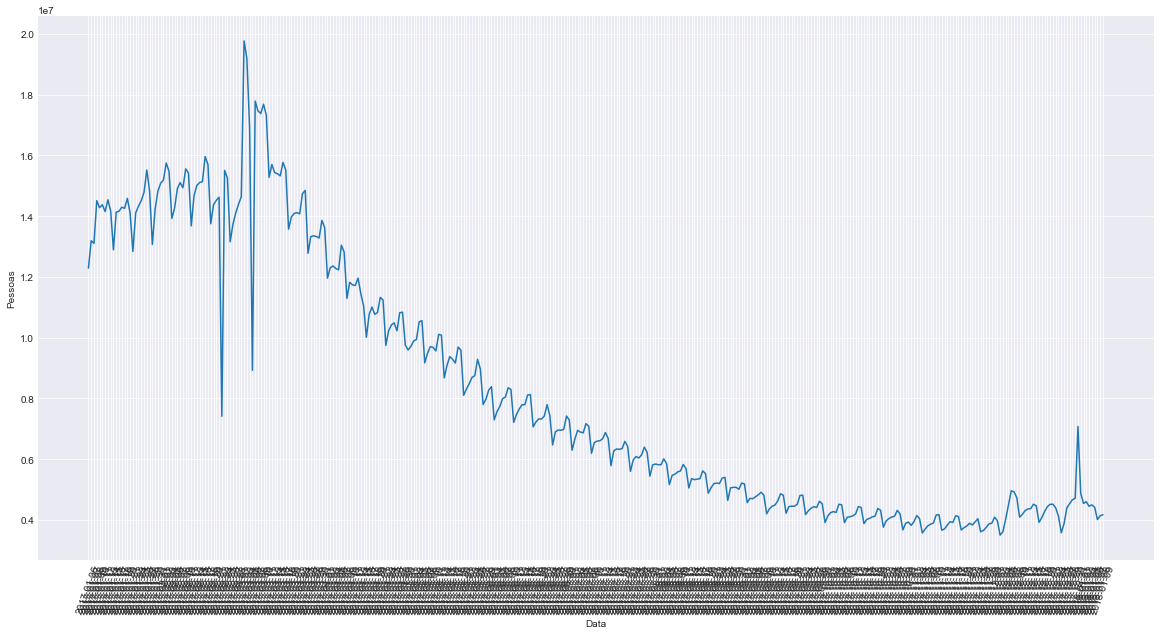

In [15]:
plt.figure(figsize=(20, 10))
plt.style.use('seaborn-darkgrid')

x1 = sns.lineplot(x="Data", y="Pessoas", data=df)
plt.xticks(rotation=70);
plt.show()

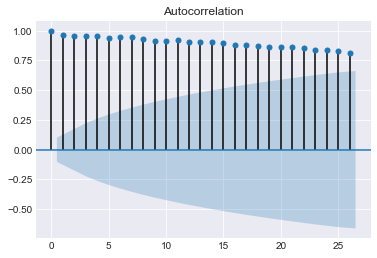

In [16]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(df["Pessoas"]);

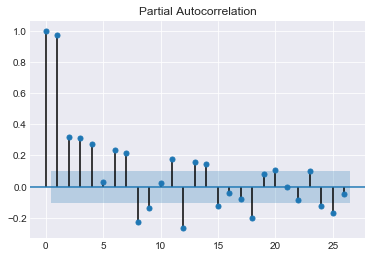

In [17]:
plot_pacf(df["Pessoas"]);

**Previsoes**

In [18]:
df_x1 = df[:26][:]
df_x2 = df[26:][:]

**Modelo SARIMA**

In [19]:
from pmdarima.arima.utils import nsdiffs

D = nsdiffs(df['Pessoas'].values, m=2, max_D=12, test='ch')
D

0

In [31]:
from pmdarima.arima import auto_arima

modelo_sarima = auto_arima(df['Pessoas'].values,start_p = 0, start_q = 0, max_p = 6, max_q = 6, d = 1,D = 1,
                            start_Q = 2, start_P = 2, max_P = 5, max_Q = 5, m = 3, seasonal = True, trace = True, 
                            error_action ='ignore',
                            suppress_warnings = True, stepwise = False, maxiter = 50)

modelo_sarima.aic()

Fit ARIMA(0,1,0)x(0,1,0,3) [intercept=True]; AIC=11332.339, BIC=11340.122, Time=0.022 seconds
Fit ARIMA(0,1,0)x(0,1,1,3) [intercept=True]; AIC=11182.219, BIC=11193.894, Time=0.065 seconds
Fit ARIMA(0,1,0)x(0,1,2,3) [intercept=True]; AIC=11181.555, BIC=11197.122, Time=0.131 seconds
Fit ARIMA(0,1,0)x(0,1,3,3) [intercept=True]; AIC=11183.488, BIC=11202.946, Time=0.214 seconds
Fit ARIMA(0,1,0)x(0,1,4,3) [intercept=True]; AIC=11181.660, BIC=11205.010, Time=0.328 seconds
Fit ARIMA(0,1,0)x(0,1,5,3) [intercept=True]; AIC=11168.960, BIC=11196.202, Time=0.523 seconds
Fit ARIMA(0,1,0)x(1,1,0,3) [intercept=True]; AIC=11256.887, BIC=11268.562, Time=0.063 seconds
Fit ARIMA(0,1,0)x(1,1,1,3) [intercept=True]; AIC=11181.989, BIC=11197.556, Time=0.151 seconds
Fit ARIMA(0,1,0)x(1,1,2,3) [intercept=True]; AIC=11182.499, BIC=11201.957, Time=0.220 seconds
Fit ARIMA(0,1,0)x(1,1,3,3) [intercept=True]; AIC=11183.594, BIC=11206.944, Time=0.586 seconds
Fit ARIMA(0,1,0)x(1,1,4,3) [intercept=True]; AIC=11185.002, 

Fit ARIMA(2,1,1)x(0,1,1,3) [intercept=True]; AIC=11100.857, BIC=11124.207, Time=0.242 seconds
Fit ARIMA(2,1,1)x(0,1,2,3) [intercept=True]; AIC=11102.789, BIC=11130.031, Time=0.427 seconds
Fit ARIMA(2,1,1)x(1,1,0,3) [intercept=True]; AIC=11170.870, BIC=11194.220, Time=0.246 seconds
Fit ARIMA(2,1,1)x(1,1,1,3) [intercept=True]; AIC=11102.830, BIC=11130.072, Time=0.332 seconds
Fit ARIMA(2,1,1)x(2,1,0,3) [intercept=True]; AIC=11167.518, BIC=11194.760, Time=0.240 seconds
Fit ARIMA(2,1,2)x(0,1,0,3) [intercept=True]; AIC=11222.415, BIC=11245.765, Time=0.218 seconds
Fit ARIMA(2,1,2)x(0,1,1,3) [intercept=True]; AIC=11101.678, BIC=11128.920, Time=0.642 seconds
Fit ARIMA(2,1,2)x(1,1,0,3) [intercept=True]; AIC=11170.606, BIC=11197.847, Time=0.303 seconds
Total fit time: 27.400 seconds


11100.857133232852

In [32]:
modelo_sarima.fit(df_x1["Pessoas"]. values)

ml_predict = modelo_sarima.predict(n_periods = 10)
ml_predict

array([12940884.53641866, 14066433.89732583, 14741113.16509659,
       12820065.25630069, 13920102.12896854, 14562836.46467358,
       12613381.78729193, 13683055.27811412, 14296508.44469429,
       12317174.01700685])

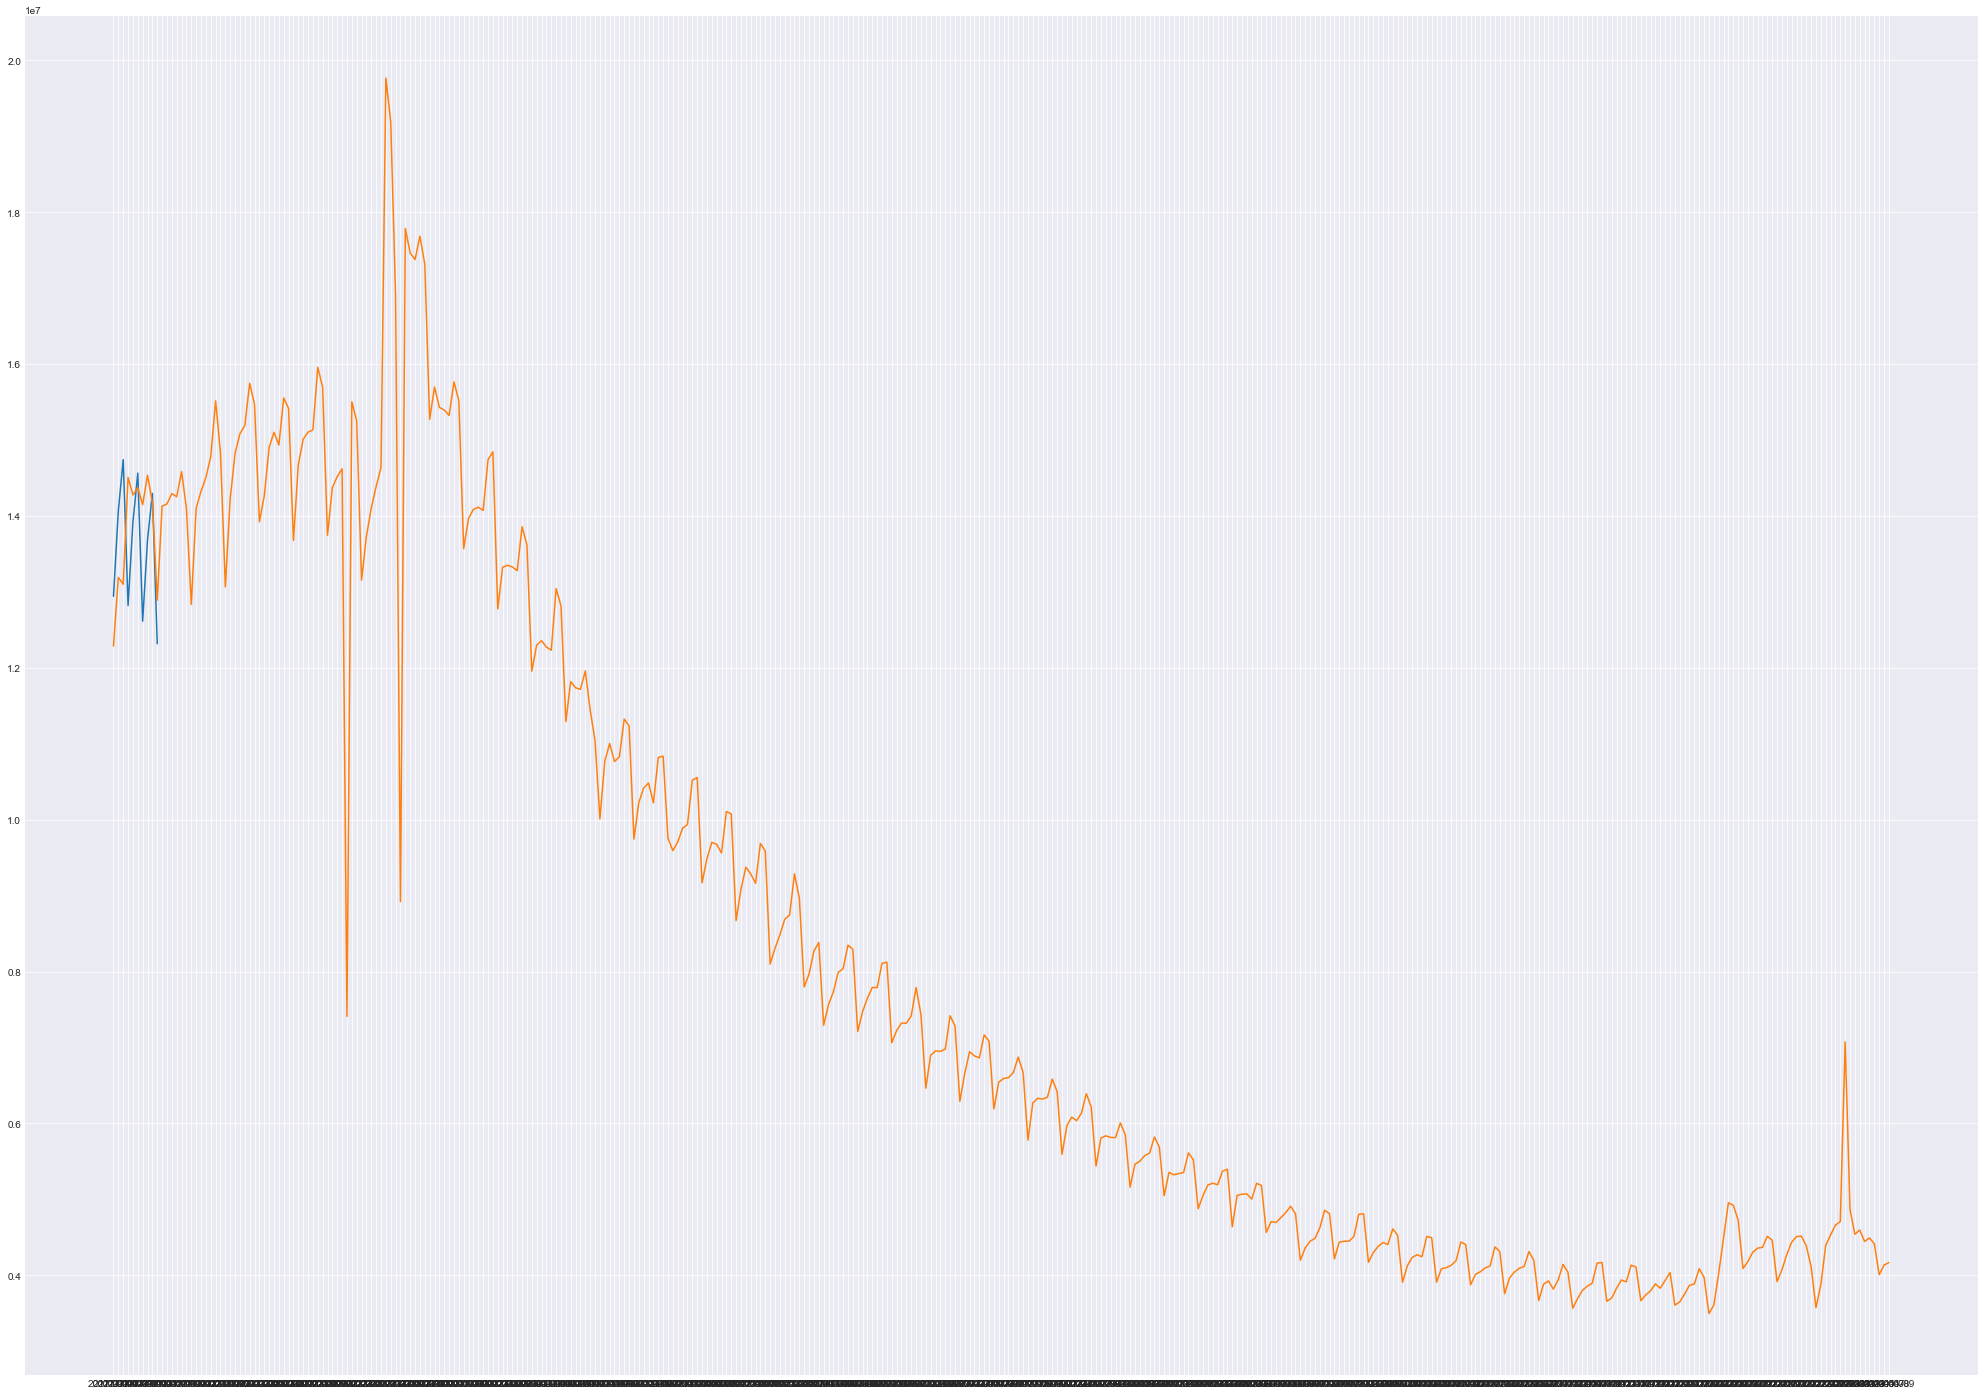

In [33]:
plt.figure(figsize = (35, 25))

plt.plot(ml_predict)
plt.plot(df["Data"], df["Pessoas"])